In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid") # sets a lovely dark visual theme


In [3]:
sns.load_dataset("tips")


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df = sns.load_dataset("tips")
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df.describe()


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df.describe(include='all')


,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [8]:
df['day'].value_counts()


Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [9]:
df['smoker'].value_counts()


No     151
Yes     93
Name: smoker, dtype: int64

In [10]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [11]:
df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [12]:
df.groupby(['sex'])


In [14]:
df.groupby(['sex']).mean()

/tmp/ipykernel_34653/1056145912.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['sex']).mean()


,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [15]:
df['tip_percent'] = df['tip']*100/df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [16]:
df.groupby(['sex']).mean()

/tmp/ipykernel_34653/1056145912.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['sex']).mean()


,total_bill,tip,size,tip_percent
sex,,,,
Male,20.744076,3.089618,2.630573,15.765055
Female,18.056897,2.833448,2.459770,16.649074


In [17]:
df.groupby(['sex', 'day']).median()

/tmp/ipykernel_34653/2939776520.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['sex', 'day']).median()


total_bill    tip  size  tip_percent
sex    day                                       
Male   Thur      16.975  2.530   2.0    15.552949
       Fri       17.215  2.600   2.0    13.373871
       Sat       18.240  3.000   2.0    15.183246
       Sun       20.725  3.085   2.0    15.784510
Female Thur      13.785  2.005   2.0    15.314259
       Fri       15.380  3.000   2.0    19.505852
       Sat       18.360  2.625   2.0    15.109110
       Sun       17.410  3.500   3.0    16.939739

In [18]:
df.groupby(['day', 'sex']).median()

/tmp/ipykernel_34653/1795977410.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['day', 'sex']).median()


total_bill    tip  size  tip_percent
day  sex                                         
Thur Male        16.975  2.530   2.0    15.552949
     Female      13.785  2.005   2.0    15.314259
Fri  Male        17.215  2.600   2.0    13.373871
     Female      15.380  3.000   2.0    19.505852
Sat  Male        18.240  3.000   2.0    15.183246
     Female      18.360  2.625   2.0    15.109110
Sun  Male        20.725  3.085   2.0    15.784510
     Female      17.410  3.500   3.0    16.939739

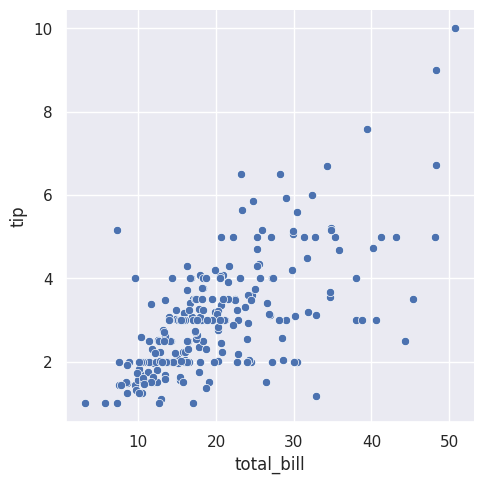

In [19]:
sns.relplot(x="total_bill", y="tip", data=df);
plt.show()


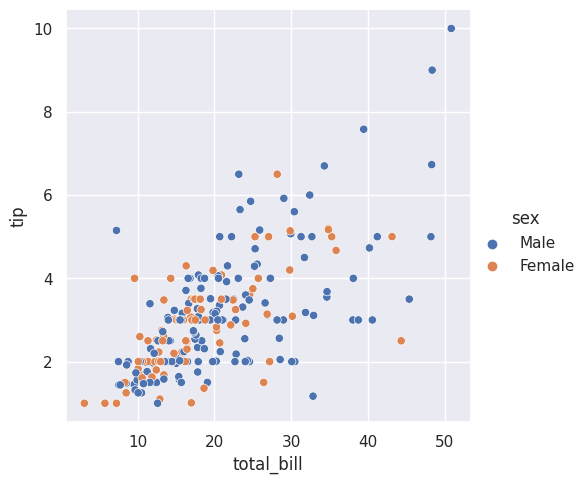

In [20]:
sns.relplot(x="total_bill", y="tip", hue='sex', data=df);
plt.show()


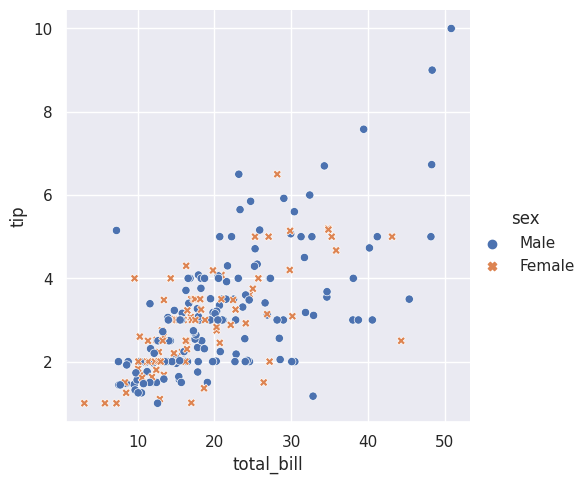

In [21]:
sns.relplot(x="total_bill", y="tip", hue='sex', style='sex', data=df);
plt.show()


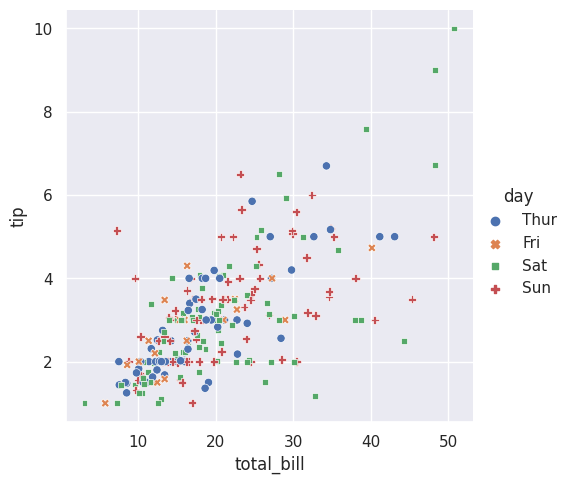

In [22]:
sns.relplot(x="total_bill", y="tip", hue='day', style='day', data=df);
plt.show()

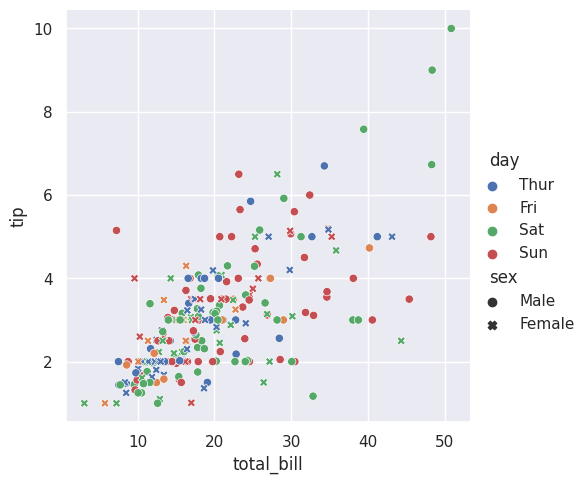

In [23]:
sns.relplot(x="total_bill", y="tip", hue='day', style='sex', data=df);
plt.show()